In [1]:
# Packages laden
import pandas as pd
import numpy as np
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.backend import binary_crossentropy
from matplotlib import pyplot as plt
from math import sqrt

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True,)

In [3]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [4]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR

In [5]:
# Preprocessing der Rohdaten: 100%
ZR_100new=np.atleast_2d(ZR_100)
if ZR_100new.shape[0]==1:
    ZR_100new=ZR_100new.T
nb_samples_100, nb_series_100 = ZR_100new.shape

In [6]:
# Einteilung in Trainings- und Testdaten: nicht mehr ZR sondern X --> X_train etc
test_size_100=int(0.3*nb_samples_100)
train_100, test_100 = ZR_100[:-test_size_100], ZR_100[-test_size_100:] 

In [7]:
# Shape des Input und Outputs anpassen: 100%
look_forward=240
window_size=12
# Trainingsdaten
Xtrain_100=np.atleast_3d(np.array([train_100[start:start+window_size] for start in range(0, train_100.shape[0]-(window_size+look_forward))]))
ytrain_100=train_100[window_size+look_forward:]
qtrain_100=np.atleast_3d([train_100[-(window_size):]])
print(qtrain_100.shape, ytrain_100.shape, Xtrain_100.shape)

# Testdaten
Xtest_100=np.atleast_3d(np.array([test_100[start:start+window_size] for start in range(0, test_100.shape[0]-(window_size+look_forward))]))
ytest_100=test_100[window_size+look_forward:]
qtest_100=np.atleast_3d([test_100[-(window_size):]])
print(qtest_100.shape, ytest_100.shape, Xtest_100.shape)

(1, 12, 1) (353,) (353, 12, 1)
(1, 12, 1) (6,) (6, 12, 1)


In [8]:
# Modell zusammenbauen: 
nb_filter_1=32
nb_filter_2=64
nb_filter_3=64
filter_length=2
nb_input_series=1
nb_outputs=1
model= Sequential()
model.add(Convolution1D(nb_filter=nb_filter_1, filter_length=filter_length, activation='relu', 
                        input_shape=(window_size, nb_input_series)))
model.add(Convolution1D(nb_filter=nb_filter_2, filter_length=filter_length, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(nb_outputs, activation='linear')) 
model.compile(loss='mse', optimizer='adam', metrics=['mae']) 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(12, 1), filters=32, kernel_size=2)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=2)`
  # This is added back by InteractiveShellApp.init_path()


In [9]:
# Modellzusammenfassung
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 11, 32)            96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 321       
Total params: 4,577
Trainable params: 4,577
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Replizierbarkeit gewährleisten
np.random.seed(5)

In [53]:
# Modellanpassen: 100%
history_reg=model.fit(Xtrain_100, ytrain_100, epochs=200, batch_size=25, validation_data=(Xtest_100, ytest_100))

Train on 353 samples, validate on 6 samples
Epoch 1/200
353/353 [==============================] - 0s 363us/step - loss: 154902586.1983 - mean_absolute_error: 9802.8913 - val_loss: 497368832.0000 - val_mean_absolute_error: 21888.7793
Epoch 2/200
353/353 [==============================] - 0s 263us/step - loss: 173140631.6827 - mean_absolute_error: 10122.4332 - val_loss: 513400352.0000 - val_mean_absolute_error: 22267.0215
Epoch 3/200
353/353 [==============================] - 0s 289us/step - loss: 161931243.9093 - mean_absolute_error: 10059.3836 - val_loss: 338375136.0000 - val_mean_absolute_error: 17881.6543
Epoch 4/200
353/353 [==============================] - 0s 320us/step - loss: 157919829.0312 - mean_absolute_error: 9935.1845 - val_loss: 324881248.0000 - val_mean_absolute_error: 17447.6250
Epoch 5/200
353/353 [==============================] - 0s 229us/step - loss: 151396744.2946 - mean_absolute_error: 9624.6053 - val_loss: 379835776.0000 - val_mean_absolute_error: 18933.9277
Epoc

Epoch 44/200
353/353 [==============================] - 0s 198us/step - loss: 169523760.5439 - mean_absolute_error: 10177.5933 - val_loss: 364479904.0000 - val_mean_absolute_error: 18680.8262
Epoch 45/200
353/353 [==============================] - 0s 212us/step - loss: 154247856.5212 - mean_absolute_error: 9768.2638 - val_loss: 289938496.0000 - val_mean_absolute_error: 16427.5195
Epoch 46/200
353/353 [==============================] - 0s 201us/step - loss: 145968157.0312 - mean_absolute_error: 9525.8771 - val_loss: 259724608.0000 - val_mean_absolute_error: 15494.6484
Epoch 47/200
353/353 [==============================] - 0s 210us/step - loss: 145696855.6034 - mean_absolute_error: 9514.7473 - val_loss: 300681088.0000 - val_mean_absolute_error: 16782.7402
Epoch 48/200
353/353 [==============================] - 0s 196us/step - loss: 140854616.4079 - mean_absolute_error: 9647.7966 - val_loss: 434722272.0000 - val_mean_absolute_error: 20456.2129
Epoch 49/200
353/353 [======================

Epoch 87/200
353/353 [==============================] - 0s 204us/step - loss: 145562857.5637 - mean_absolute_error: 9512.5777 - val_loss: 322094496.0000 - val_mean_absolute_error: 17366.2871
Epoch 88/200
353/353 [==============================] - 0s 201us/step - loss: 137469252.4419 - mean_absolute_error: 9248.9280 - val_loss: 292070912.0000 - val_mean_absolute_error: 16526.0566
Epoch 89/200
353/353 [==============================] - 0s 221us/step - loss: 145382939.6034 - mean_absolute_error: 9479.6199 - val_loss: 277258528.0000 - val_mean_absolute_error: 16138.3936
Epoch 90/200
353/353 [==============================] - 0s 201us/step - loss: 143880917.2521 - mean_absolute_error: 9538.5000 - val_loss: 302014624.0000 - val_mean_absolute_error: 16762.0781
Epoch 91/200
353/353 [==============================] - 0s 215us/step - loss: 136655670.0567 - mean_absolute_error: 9353.7296 - val_loss: 398215456.0000 - val_mean_absolute_error: 19531.1621
Epoch 92/200
353/353 [=======================

Epoch 130/200
353/353 [==============================] - 0s 244us/step - loss: 136322386.9235 - mean_absolute_error: 9180.4689 - val_loss: 314097408.0000 - val_mean_absolute_error: 17299.8477
Epoch 131/200
353/353 [==============================] - 0s 278us/step - loss: 131532418.0000 - mean_absolute_error: 9110.4026 - val_loss: 361077376.0000 - val_mean_absolute_error: 18546.1641
Epoch 132/200
353/353 [==============================] - 0s 264us/step - loss: 132733365.0312 - mean_absolute_error: 9217.5832 - val_loss: 329662112.0000 - val_mean_absolute_error: 17697.9746
Epoch 133/200
353/353 [==============================] - 0s 269us/step - loss: 136830387.4788 - mean_absolute_error: 9245.5402 - val_loss: 291964800.0000 - val_mean_absolute_error: 16550.2188
Epoch 134/200
353/353 [==============================] - 0s 278us/step - loss: 135100816.3853 - mean_absolute_error: 9100.4412 - val_loss: 277697696.0000 - val_mean_absolute_error: 16150.2783
Epoch 135/200
353/353 [=================

Epoch 173/200
353/353 [==============================] - 0s 266us/step - loss: 134536012.0680 - mean_absolute_error: 9148.0750 - val_loss: 239031552.0000 - val_mean_absolute_error: 14775.7734
Epoch 174/200
353/353 [==============================] - 0s 249us/step - loss: 126959258.9915 - mean_absolute_error: 8838.2474 - val_loss: 343949088.0000 - val_mean_absolute_error: 17978.3965
Epoch 175/200
353/353 [==============================] - 0s 235us/step - loss: 130985218.5156 - mean_absolute_error: 8938.5848 - val_loss: 264950704.0000 - val_mean_absolute_error: 15715.3555
Epoch 176/200
353/353 [==============================] - 0s 286us/step - loss: 130447678.1870 - mean_absolute_error: 8969.1951 - val_loss: 337260384.0000 - val_mean_absolute_error: 17786.4746
Epoch 177/200
353/353 [==============================] - 0s 331us/step - loss: 127862560.9178 - mean_absolute_error: 8868.3242 - val_loss: 235025664.0000 - val_mean_absolute_error: 14640.7061
Epoch 178/200
353/353 [=================

Text(0.5,1,'Loss Curves')

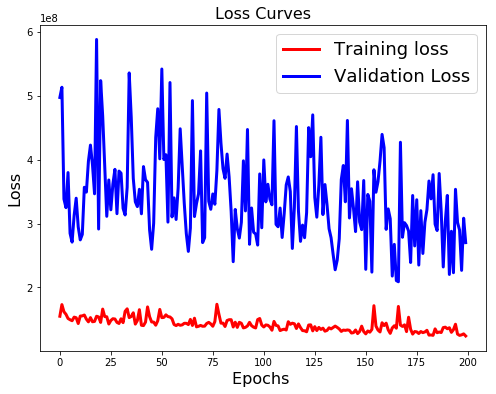

In [54]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

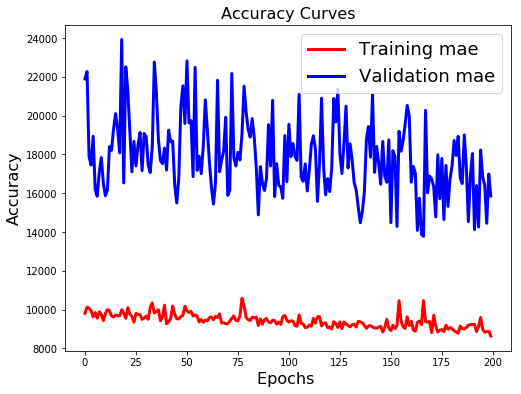

In [55]:
#Plotten der Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['mean_absolute_error'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_mean_absolute_error'],'b',linewidth=3.0)
plt.legend(['Training mae', 'Validation mae'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [56]:
# Vorhersage generieren
predictions_100 = model.predict(Xtest_100)

predictions_train_100=model.predict(Xtrain_100)

In [57]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_100, predictions_100)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_100, predictions_train_100)
print('Train MSE: %.3f' % mse_train)

Test MSE: 270152940.537
Train MSE: 125202796.099


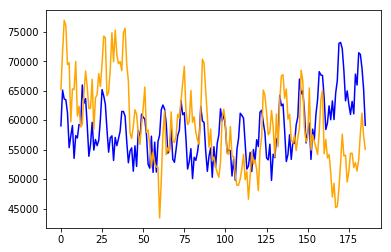

In [78]:
# Abtragen von Vorhersage und Testdaten
plt.plot(ytest_100, color='blue') 
plt.plot(predictions_100, color='orange') 
plt.show()

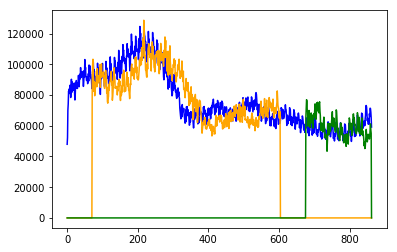

In [79]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(window_size+look_forward-1):len(predictions_train_100)+(window_size+look_forward-1)] = predictions_train_100


# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(predictions_train_100)+2*(window_size+look_forward)-1:len(ZR_100)-1] = predictions_100
     
       
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()